# EMNIST CLASSFIER 

In [63]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, tree
import seaborn as sns


In [64]:
# ead the data

df = pd.read_csv("emnist_letters.csv",  header=None)
print(df.head())

  0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0   F    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1   Q    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2   W    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3   K    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4   F    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]


In [65]:
df[0].value_counts()

0
F    2400
Q    2400
I    2400
B    2400
X    2400
R    2400
A    2400
G    2400
V    2400
U    2400
Y    2400
M    2400
N    2400
S    2400
Z    2400
P    2400
T    2400
J    2400
E    2400
H    2400
C    2400
O    2400
D    2400
K    2400
W    2400
L    2400
Name: count, dtype: int64

In [66]:
#function to rotate the images

def flip_rotate(image):
    """
    Función que recibe un array de numpy representando una
    imagen de 28x28. Espeja el array y lo rota en 90°.
    """
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

Let's see how the letters look

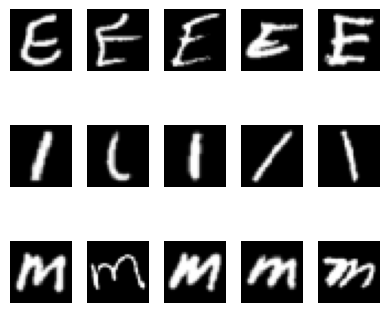

In [67]:

Es = df[df[0] == "E"]
Ls = df[df[0] == "L"]
Ms = df[df[0] == "M"]

dict = {'E': Es , 'L' : Ls , 'M' : Ms}

fig , axs = plt.subplots(3,5,figsize=(4,4))

for i , (letter, data) in enumerate(dict.items()):
    for j  in range(5):
        row = data.iloc[j].drop(0)
        image_array = np.array(row).astype(np.float32)
        image = flip_rotate(image_array)
        axs[i, j].imshow(image,cmap='gray')
        axs[i, j].axis('off')


plt.tight_layout()
plt.show()

## PART 1: Let's find the best KNN model to determine if an image is a letter A or a letter L.

In [68]:
As = df[df[0] == 'A']
Ls = df[df[0] == 'L']

print(As.shape)
print(Ls.shape)

(2400, 785)
(2400, 785)


In [69]:
LAs = df[df[0].isin(['A','L'])]

X = LAs.drop(0,axis=1)
y = LAs[0]

In [70]:
X_train , X_test , y_train , y_test = train_test_split(X,y, random_state=42,test_size=0.3)

In [71]:
# function to display the list of attribute combinations with their corresponding accuracy, sorted in decreasing order.
def kneigh(k, attributes):
    results = []

    np.random.seed(42)
    for i in range(15):
        combination = np.random.randint(1,785,size=attributes)
        X_train_subset = X_train[combination]
        X_test_subset = X_test[combination]

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_subset,y_train)
        y_pred = knn.predict(X_test_subset)

        results.append((combination, metrics.accuracy_score(y_test, y_pred)))

    results = sorted(results,key=lambda x: x[1], reverse= True)
    return results 

let's see the acurracy of the model with 3, 9 and 12 different attributs.

In [72]:
# the model with 3 neighbors and 3 attributes
res3 = kneigh(3,3)
print (res3)

[(array([344, 492, 414]), 0.9013888888888889), (array([467, 215, 331]), 0.8881944444444444), (array([386, 192, 277]), 0.8277777777777777), (array([687, 563, 567]), 0.7909722222222222), (array([161, 460, 314]), 0.7798611111111111), (array([103, 436, 271]), 0.7701388888888889), (array([100, 664, 131]), 0.7263888888888889), (array([700, 783, 190]), 0.6972222222222222), (array([511, 682, 476]), 0.6847222222222222), (array([662, 309, 770]), 0.6736111111111112), (array([459,  88, 373]), 0.625), (array([ 22, 253, 748]), 0.4951388888888889), (array([ 21, 615, 122]), 0.4930555555555556), (array([561, 475,  59]), 0.4895833333333333), (array([107,  72, 701]), 0.4701388888888889)]


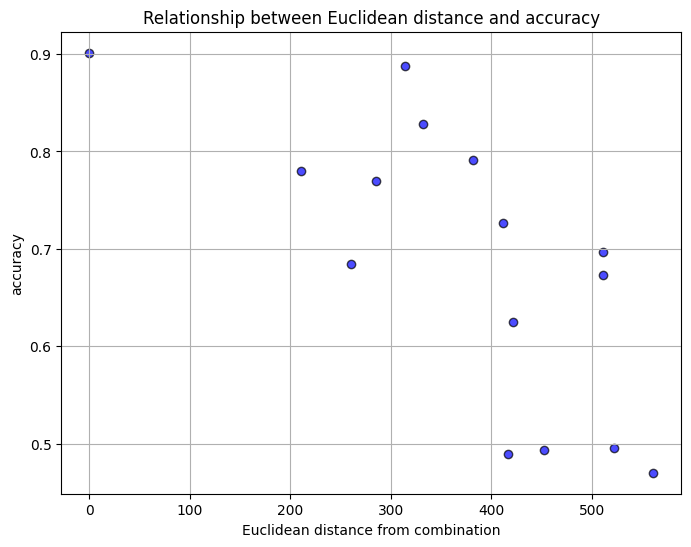

In [73]:

vectors = [entry[0] for entry in res3]
accuracy = [entry[1] for entry in res3]

reference_vector = vectors[0]
distances = [np.linalg.norm( reference_vector - vec) for vec in vectors]

plt.figure(figsize=(8, 6))
plt.scatter(distances, accuracy, c='blue', alpha=0.7, edgecolor='k')
plt.title("Relationship between Euclidean distance and accuracy")
plt.xlabel("Euclidean distance from combination")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()



As the Euclidean distance increases, the accuracy tends to decrease. This suggests that combinations with smaller Euclidean distances are associated with higher accuracy.

In [74]:
# the model with 3 neighbors and 9,12 attributes
res9 = kneigh(3,9)
res12 = kneigh(3,12)
print(res9)
print(res12)

[(array([764, 188, 380, 493,  41, 157,  15,  65, 521]), 0.9375), (array([662, 309, 770, 344, 492, 414, 386, 192, 277]), 0.9298611111111111), (array([135, 201, 780,  33,  48, 503, 407, 574, 728]), 0.9284722222222223), (array([467, 215, 331, 459,  88, 373, 100, 664, 131]), 0.9083333333333333), (array([244, 505, 131, 485, 647,  21, 167, 274, 388]), 0.8986111111111111), (array([601, 316,  14, 242, 777, 346, 565, 340,  92]), 0.8916666666666667), (array([730, 556, 162, 202, 270, 271, 456, 462, 727]), 0.8659722222222223), (array([511, 682, 476, 700, 783, 190, 687, 563, 567]), 0.8138888888888889), (array([103, 436, 271, 107,  72, 701,  21, 615, 122]), 0.8125), (array([344, 129, 648, 472,  63, 139, 499, 593, 392]), 0.7979166666666667), (array([388,   2, 390, 566, 106, 772, 477, 703, 402]), 0.7965277777777777), (array([252, 702, 296, 725, 720, 749, 338,  53, 217]), 0.7895833333333333), (array([675, 419, 289, 379, 773, 490, 231,  41,  28]), 0.7888888888888889), (array([161, 460, 314,  22, 253, 74

In [75]:
print(f"""
    With 3 attributes\n
         Maximum accuracy: {res3[0][1]:.3}.\n
         Average accuracy: {np.mean([accuracy[1] for accuracy in res3]):.3}.\n\n
    With 9 attributes\n
         Maximum accuracy: {res9[0][1]:.3}.\n
         Average accuracy: {np.mean([accuracy[1] for accuracy in res9]):.3}.\n\n
    With 12 attributes\n
         Maximum accuracy: {res12[0][1]:.3}.\n
         Average accuracy: {np.mean([accuracy[1] for accuracy in res12]):.3}.
""")



    With 3 attributes

         Maximum accuracy: 0.901.

         Average accuracy: 0.688.


    With 9 attributes

         Maximum accuracy: 0.938.

         Average accuracy: 0.842.


    With 12 attributes

         Maximum accuracy: 0.971.

         Average accuracy: 0.888.



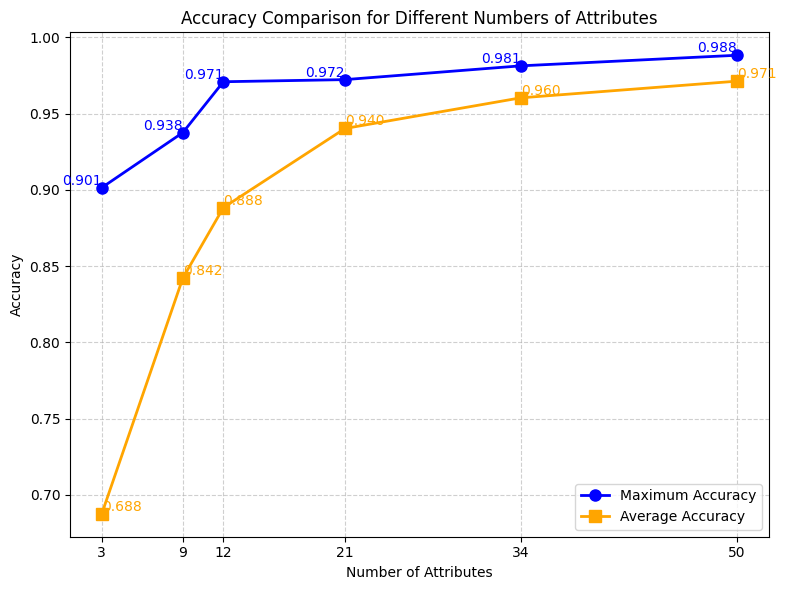

In [76]:

attributes = [3,9,12,21,34,50]
avg_accuracies = []
max_accuracies = []
for n in attributes:
    resn = kneigh(3,n)
    avg_accuracies.append(np.mean([accuracy[1] for accuracy in resn]))
    max_accuracies.append(resn[0][1])

# Create the line plot
plt.figure(figsize=(8, 6))
plt.plot(attributes, max_accuracies, marker='o', label='Maximum Accuracy', color='blue', linewidth=2, markersize=8)
plt.plot(attributes, avg_accuracies, marker='s', label='Average Accuracy', color='orange', linewidth=2, markersize=8)

# Add labels, title, and legend
plt.xlabel("Number of Attributes")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison for Different Numbers of Attributes")
plt.xticks(attributes)  # Set x-axis ticks to match the attribute values
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Annotate points with values
for x, y in zip(attributes, max_accuracies):
    plt.text(x, y, f'{y:.3f}', ha='right', va='bottom', fontsize=10, color='blue')
for x, y in zip(attributes, avg_accuracies):
    plt.text(x, y, f'{y:.3f}', ha='left', va='bottom', fontsize=10, color='orange')

plt.tight_layout()
plt.show()


we can see that given more attributes the average and maximum accuracy of the model increase, but we can take 12 as a significant amount of attributes that maximize the accuracy and reduce time complexity.

### Lets see what happend with more neighboors 'k'

In [77]:
neighbors = [3,6,9,12,15,20,25,32]

res_k = {}
for k in neighbors:
    res = kneigh(k,12)  # we are going to use only 12 attributes
    res_k[k] = res

In [78]:
best_k = max(res_k, key=lambda k: res_k[k][0][1])  
best_accuracy = res_k[best_k][0][1]

print(f"The best value for k is {best_k} with an accuracy of {best_accuracy:.3f}.")

The best value for k is 9 with an accuracy of 0.973.


#### In conclusion, the best KNN model (in terms of accuracy):
- **k = 9**
- **Attributes = 12**
- **Accuracy = 0.973**


## PART 2 : Let's determine the best model of decision trees for vowel classification in images."

In [79]:
df_vowels = df[df[0].isin(['A','E','I','O','U'])]

X_vowels = df_vowels.drop(0,axis=1)
y_vowels = df_vowels[0]

X_vow_train , X_vow_test, y_vow_train , y_vow_test = train_test_split(X_vowels,y_vowels,random_state=42, test_size=0.3)

In [80]:
#function to train a decesion tree model
def accuracy_tree(X, y , X_test, y_test, hmax, criterion = 'gini' ):
    tr = tree.DecisionTreeClassifier(max_depth = hmax, criterion = criterion)
    tr.fit(X,y)

    pred = tr.predict(X_test)
    accuracy = np.mean([pred == y_test])
    return accuracy

In [81]:
#lets try different depths 
for h in range(1,14,2):
    acc_tree = accuracy_tree(X_vow_train,y_vow_train,X_vow_test,y_vow_test,h)
    print(f'For a depth of {h}, the accuracy is {acc_tree:.2f}')
    

For a depth of 1, the accuracy is 0.38
For a depth of 3, the accuracy is 0.69
For a depth of 5, the accuracy is 0.86
For a depth of 7, the accuracy is 0.91
For a depth of 9, the accuracy is 0.92
For a depth of 11, the accuracy is 0.91
For a depth of 13, the accuracy is 0.92


we can see that a depth of 9 seems optimal because it achieves the highest accuracy (0.92) without adding unnecessary complexity. Increasing the depth beyond this point does not significantly improve accuracy and could lead to overfitting.

Lets do cross validation with k-folding

In [82]:
data = {'hmax':[], 'criterion':[], 'avg_acc': []}
record = pd.DataFrame(data = data)

In [83]:
def matrix_kfold(criterion):
    heights = [1,2,3,5,10,15]
    nsplits = 5
    results = np.zeros((nsplits,len(heights)))
    kf = KFold(n_splits=nsplits, shuffle= True, random_state=42)

    for i, (train_index,test_index) in enumerate(kf.split(X_vow_train)):
        kf_X_train , kf_X_test = X_vow_train.iloc[train_index], X_vow_train.iloc[test_index]
        kf_y_train , kf_y_test = y_vow_train.iloc[train_index], y_vow_train.iloc[test_index]

        for j , hmax in enumerate(heights):
            score = accuracy_tree(X = kf_X_train, y = kf_y_train, X_test = kf_X_test, y_test = kf_y_test,hmax=hmax, criterion = criterion)
            results[i,j] = score

    avg_scores = zip(heights, results.mean(axis=0))
    return avg_scores


In [84]:
criterions =['gini','entropy','log_loss']

for criterion in criterions:
    scores = matrix_kfold(criterion)

    for h, score in scores:
        record.loc[len(record.index)] = [h,criterion,score]

record.sort_values(by = 'avg_acc',ascending = False , inplace = True, ignore_index = True)

In [85]:
record.head()

,hmax,criterion,avg_acc
0,15,entropy,0.919286
1,10,entropy,0.918690
2,15,log_loss,0.917143
3,10,gini,0.916548
4,10,log_loss,0.916190


we can see that the best result is given by a tree with:
 - maximum depth of 15
 - criterion 'entropy'
 - we get 92% of accuracy

Now let's analyze the errors made by the model using a confusion matrix

In [90]:
def confusion_matrix(pred,actual):
    mark = {'A':0,'E':1,'I':2,'O':3,'U':4}
    matrix = np.zeros((5,5))
    for i in range (len(pred)):
        matrix[mark[pred[i]],mark[actual[i]]] += 1
    return matrix

In [91]:
tr = tree.DecisionTreeClassifier(max_depth=15,criterion='entropy')
tr.fit(X_vow_train,y_vow_train)
pred = tr.predict(X_vow_test)
matrix = confusion_matrix(pred,list(y_vow_test))

In [92]:
matrix

array([[623.,  22.,   7.,  21.,  24.],
       [ 33., 634.,  14.,  11.,  12.],
       [ 15.,  13., 715.,   0.,   5.],
       [ 16.,  13.,   0., 665.,  20.],
       [ 27.,  15.,   3.,  21., 671.]])

Text(50.722222222222214, 0.5, 'Predicted values')

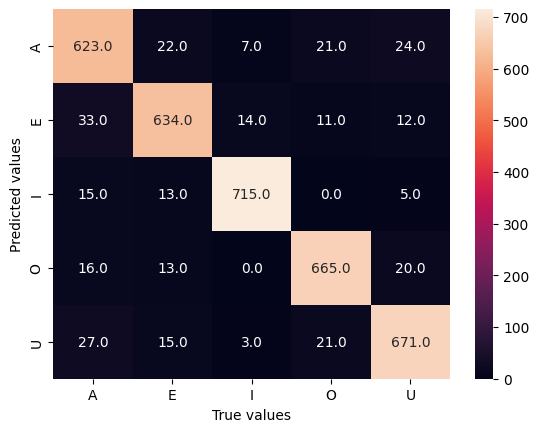

In [94]:
sns.heatmap(matrix, annot=True, fmt=".1f", xticklabels=["A","E","I","O","U"],yticklabels=["A","E","I","O","U"])
plt.xlabel("True values")
plt.ylabel("Predicted values")

Finally we determianted the best model, wich has a 92% of accuracy. In the confusion matrix we can see that the letter I is the most easy to predict by the model and the A the least.